In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.PREC_F.027001-027912.nc')

In [3]:
plotvar = data.variables['PREC_F'][8,:,:]
lont = data.variables['TLONG']
latt = data.variables['TLAT']
lont1 = lont[224:343,600:1400]
latt1 = latt[224:343,600:1400]
#########121-09
lont = lont[0:600,:]
latt = latt[0:600,:]
plotvar = plotvar[0:600,:]
#plotvars = plotvars[15,:,:]
plotvar[plotvar == -1] = np.nan

In [4]:
np.nanmax(plotvar*1000000)

73.05978942895308

In [5]:
plotvar[0:100,0]

masked_array(data=[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, 3.3375051611272966e-09,
                   7.389602707519316e-09, 1.632022694764146e-08],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False,

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'spacing'
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: No contour levels were found within the data range.


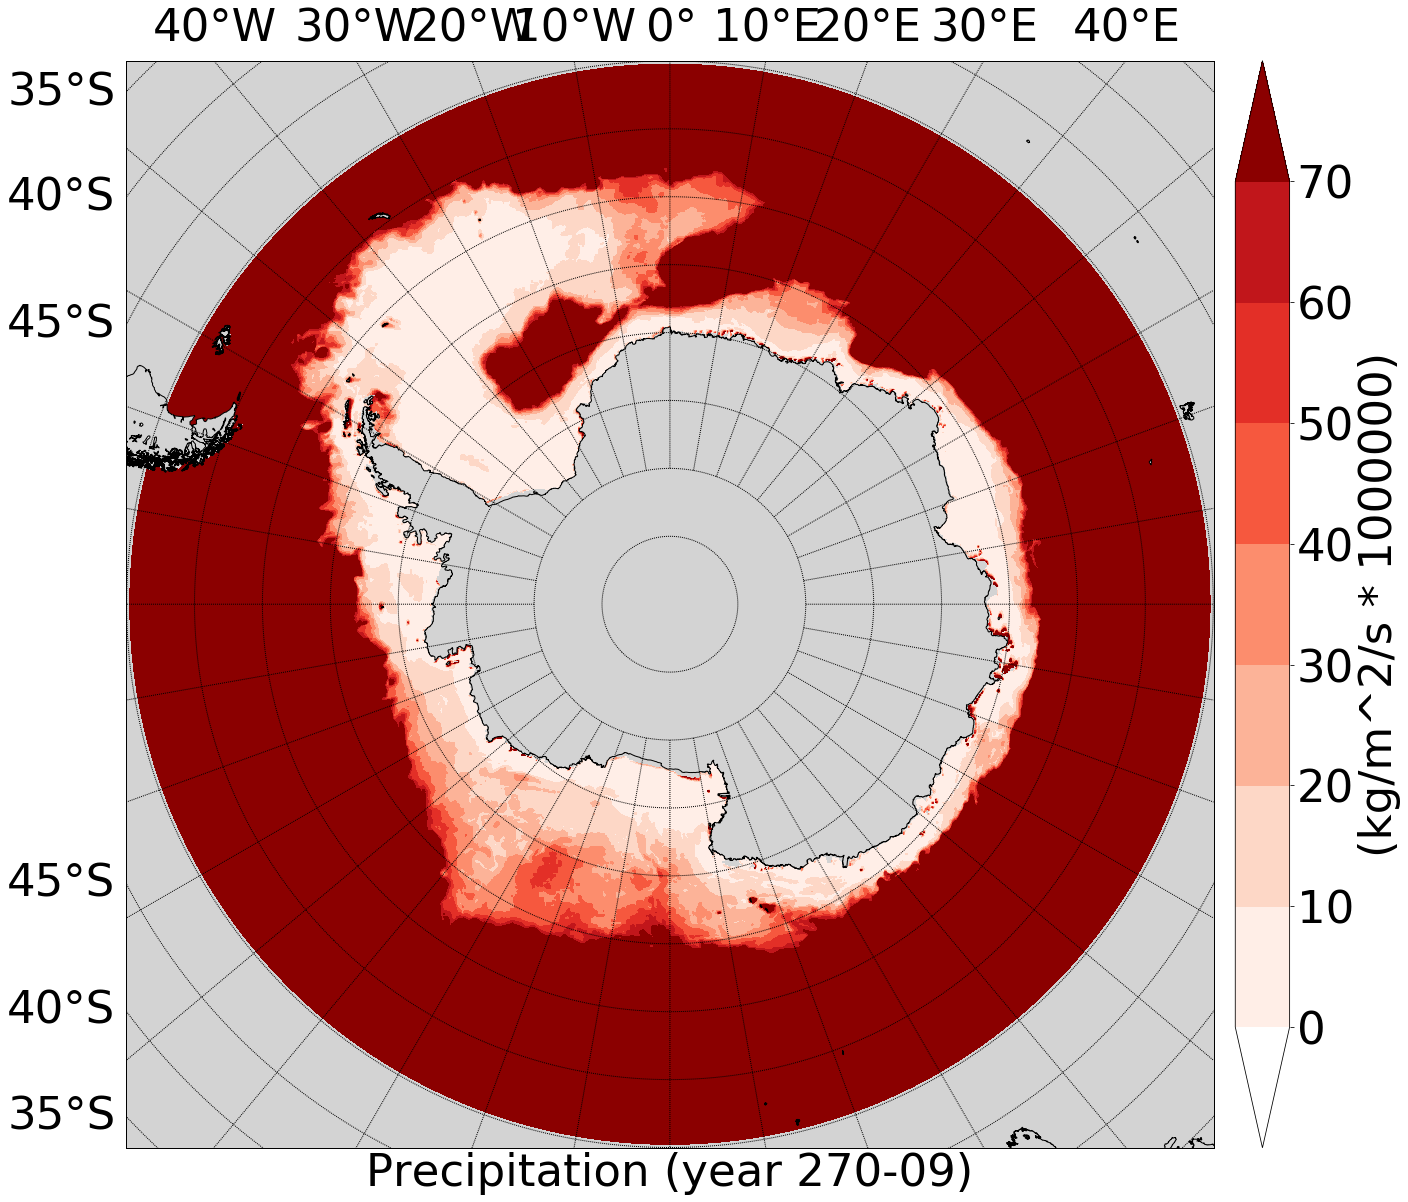

In [11]:
#####################################################################
nice_cmap=plt.get_cmap('Reds')
lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200])
new_cmap = cols.ListedColormap(lev_cmap,"Reds")
#nice_levels = [34.20,34.30,34.35,34.40,34.45,34.50,34.65,34.70,34.72,34.73]
nice_levels = [0,10,20,30,40,50,60,70]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************
##34.50,34.55,34.60,
plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'45'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                width = 8900000,height = 8900000,resolution ='h') 
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,plotvar*10000000,cmap = new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
map.drawmapboundary(fill_color='lightgrey')
CP.cmap.set_over('darkred')
CP.cmap.set_under('white')

#CS=map.contour(x,y,plotvar,[0.1,0.2],colors = 'b', linestyles = 'solid',linewidths=3)
CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
plt.clabel(CS, inline=0.1, fontsize=30)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto')
cbar.ax.tick_params(labelsize=45) 
cbar.set_label('(kg/m^2/s * 1000000)', **my_font)
plt.xlabel('Precipitation (year 270-09)',**my_font)

plt.savefig("PRECnnnn-09.png",bbox_inches='tight')